# MNIST DATA Basic Approach

### Softmax Regression Approach

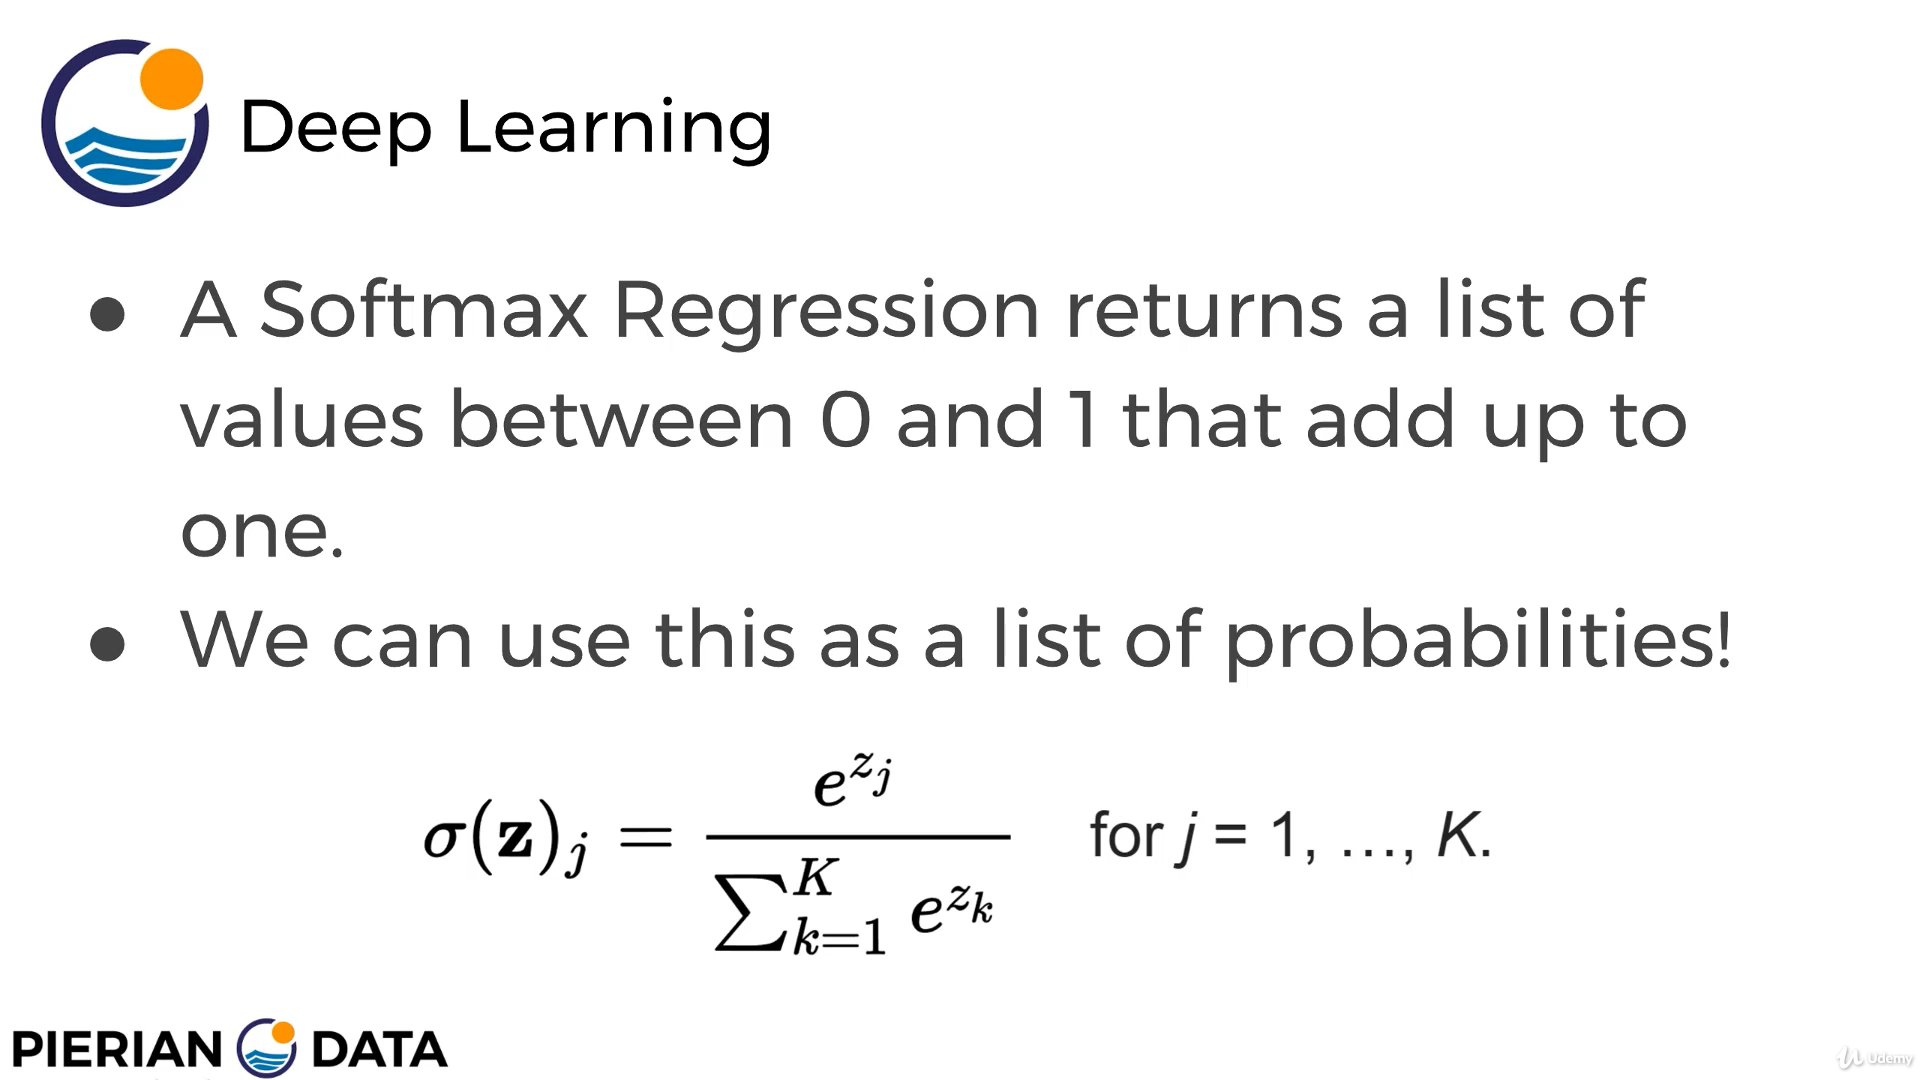

### Softmax Activation Function is used instead of Sigmoid 

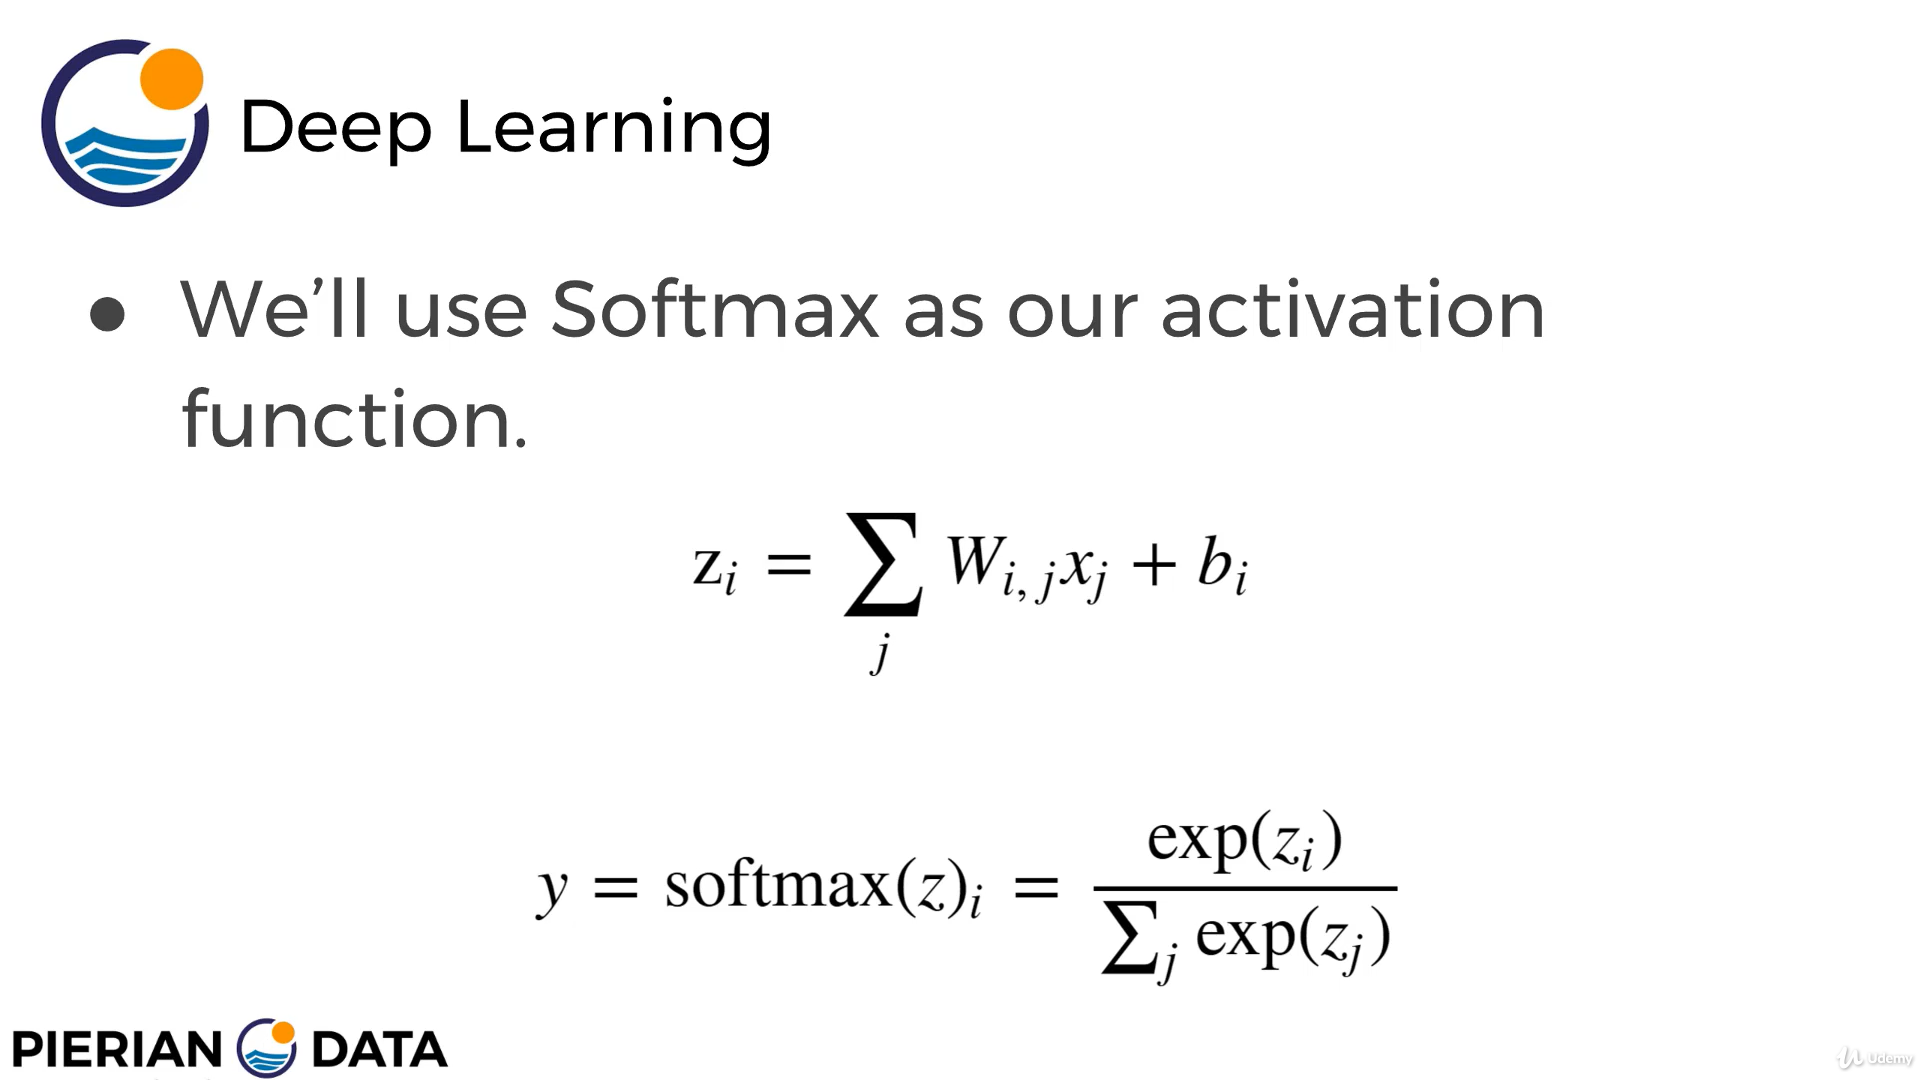

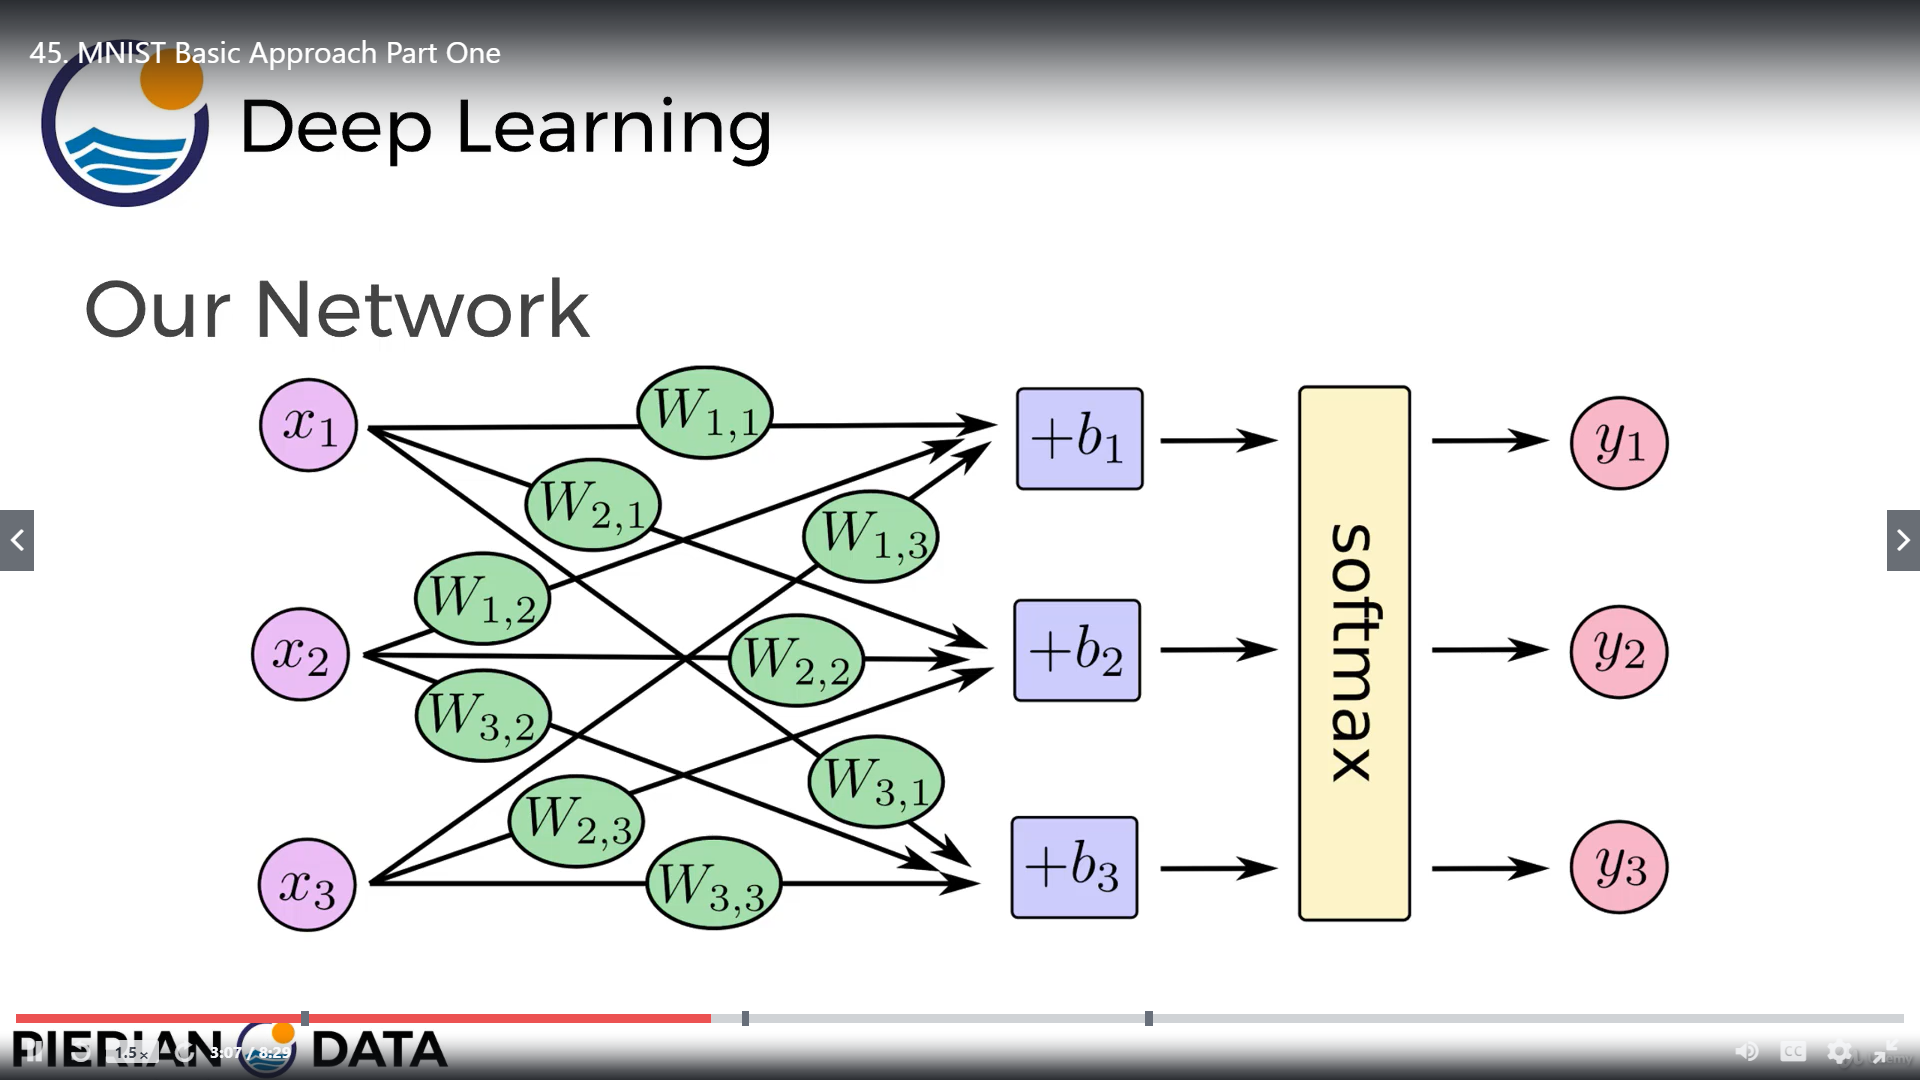

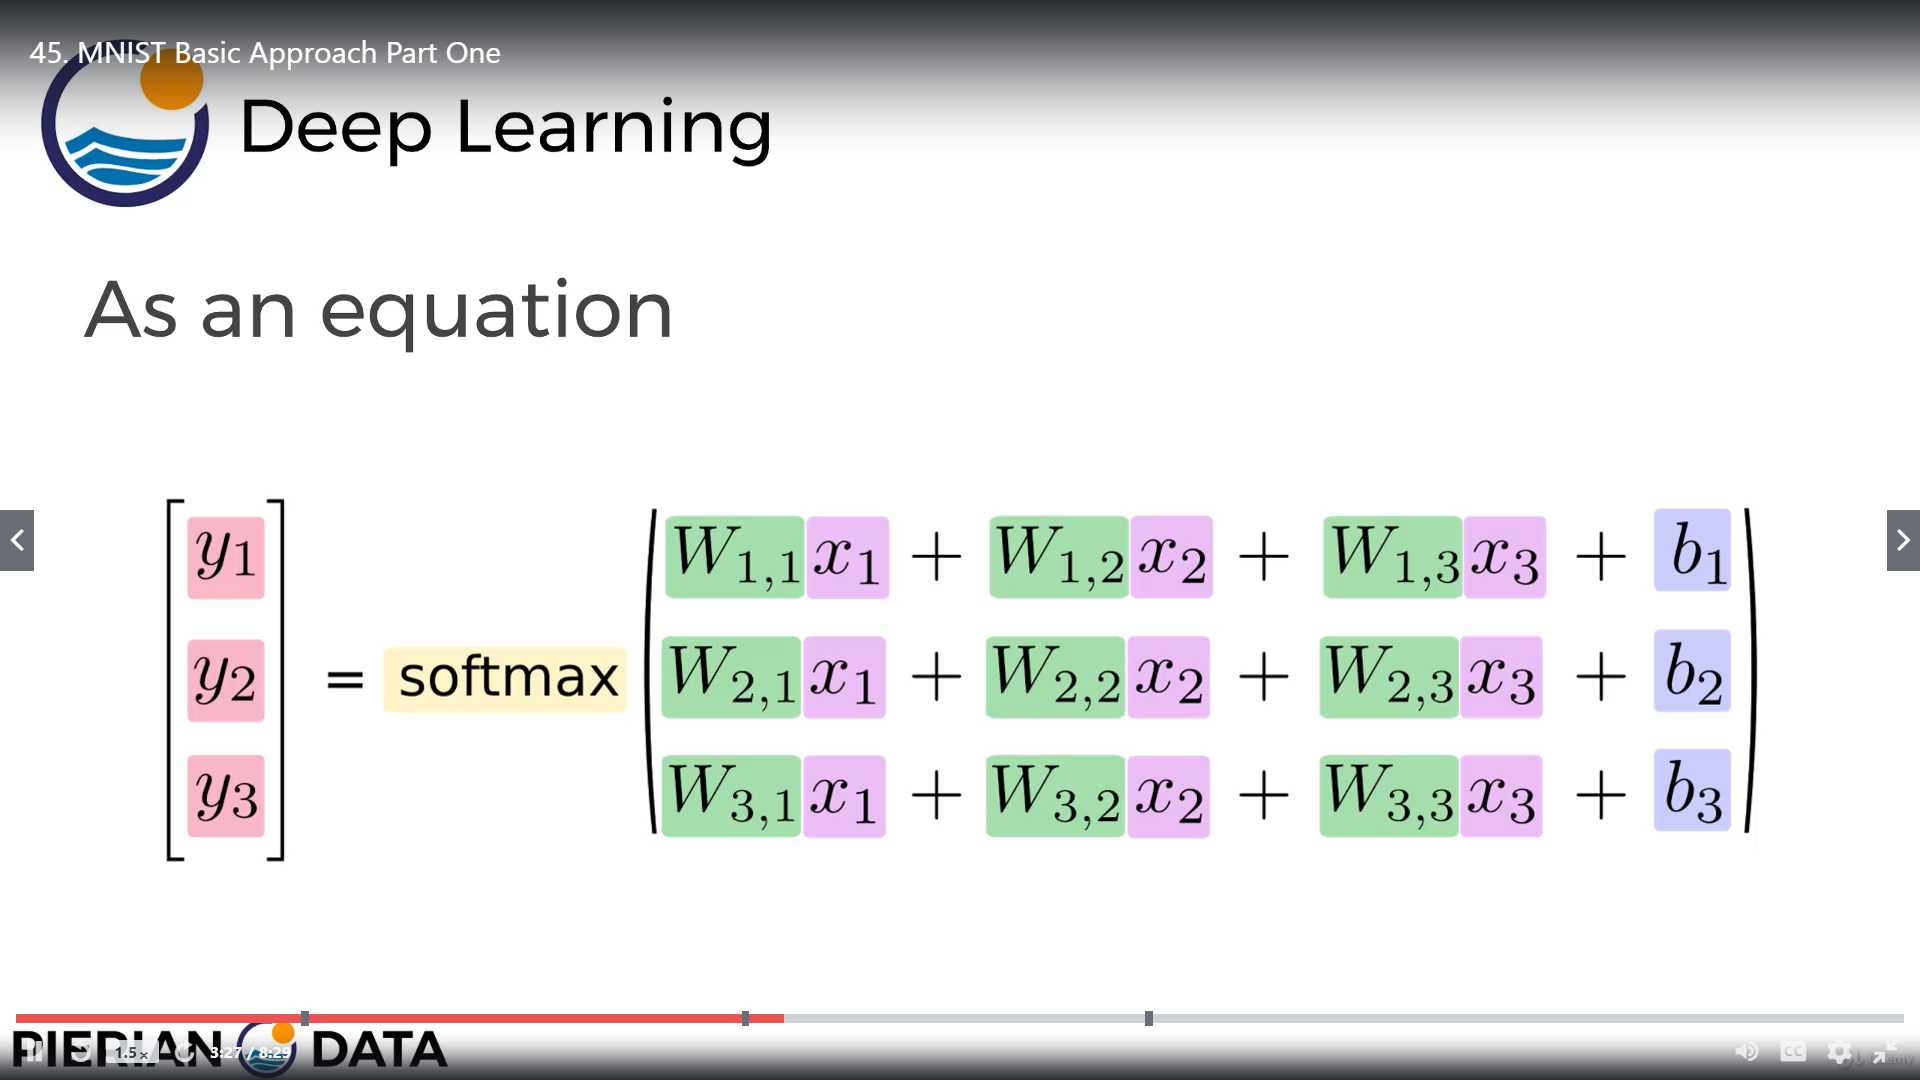

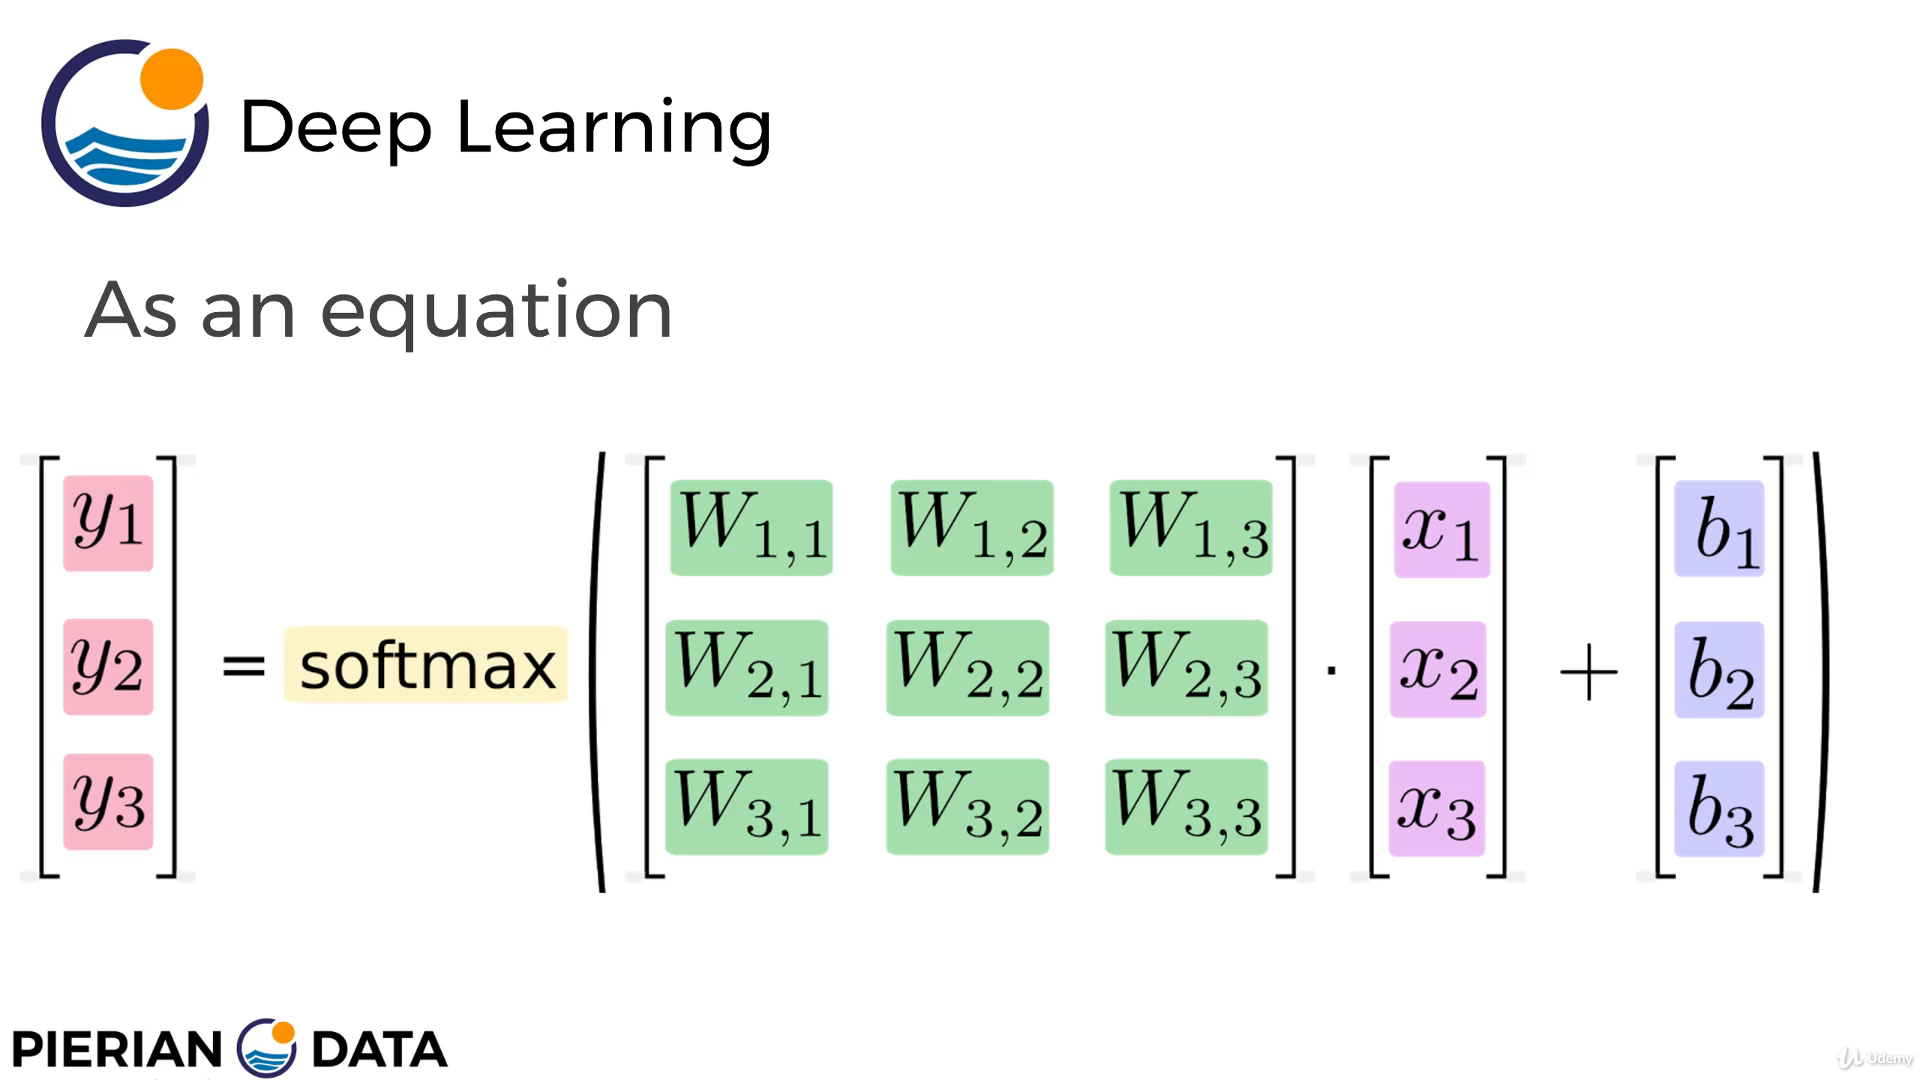

-----

In [2]:
import os
print(os.getcwd())

C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\03-Convolutional-Neural-Networks


In [3]:
# Download Dataset
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
#If you run these from another location , It will download ,But if run it where it is already downloaded
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [6]:
mnist.train.num_examples

55000

In [7]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
mnist.test.num_examples

10000

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
mnist.train.images.shape

(55000, 784)

In [11]:
mnist.train.images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
#These array is flattened , we will reshape this
mnist.train.images[1].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
single_image = mnist.train.images[1].reshape(28,28)

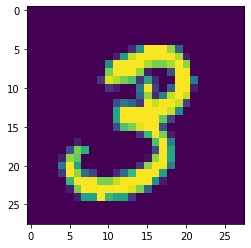

In [14]:
plt.imshow(single_image)

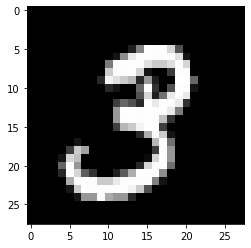

In [15]:
# Grayscale
plt.imshow(single_image,cmap='gist_gray')

In [16]:
# Image is already been normalized
print(single_image.min())
print(single_image.max())

0.0
1.0


## Softmax Regression Approach

### Steps

1.Placeholders \
2.Variables \
3.Create Graph Operations \
4.Loss Function \
5.Optimizer \
6.Create Session

In [17]:
## Step 1 - Placeholders

x = tf.placeholder(tf.float32,shape=[None,784])

In [18]:
## Step 2 - Varaibles - Initialize it with Zero - We can also use Xavier Initialization

W = tf.Variable(tf.zeros([784,10])) #784 pixels by 10 labels
b = tf.Variable(tf.zeros([10]))

In [19]:
## Step 3 -Create Graph Operations

y = tf.matmul(x,W) + b

In [20]:
## Step 4 - Loss Function

y_true = tf.placeholder(tf.float32,[None,10])

### Cross Entropy Loss Function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_true,logits=y)) # y - actual prediction

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [21]:
## Step 5 - Optimizer

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [ ]:
## Step 6 - Create Session

init = tf.global_variables_initializer()

with tf.Session() as sess:
    
    sess.run(init)
    
    for step in range(1):
        
        #Will feed in batches
        batch_x,batch_y = mnist.train.next_batch(1) # Will return batch of training samples
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
        
    # Evaluate Model
    # Our prediction in y = Wx + b
    #Where in index position y is greatest
    correct_prediction = tf.equal(tf.argmax(y,axis=1) , tf.argmax(y_true,1))
    
    # [True,False....] - correct_prediction 
    
    # Convert into 0 and 1
    acc = tf.reduce_mean(tf.cast(correct_prediction,tf.float32)) #Average of 0 AND 1
    
    # Above 2 lines
    #Predict [3,4] True [3,9]
    #correct_prediction - [True,False]
    #converted - [1.0,0.0]
    #Average i-e Accuracy - 0.5
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

----

## Convolution Neural Network - MNIST DATASET



In [1]:
# Import Dataset

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist =  input_data.read_data_sets('MNIST_data/',one_hot=True)

C:\Users\Lucky_Rathod\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Lucky_Rathod\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Lucky_Rathod\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# Helper Functions

## Initialize Weights

def init_weights(shape):
    
    init_random_dist = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(init_random_dist)

## Initialize Bias

def init_bias(shape):
    
    init_bias_vals = tf.constant(0.1,shape=shape)
    return tf.Variable(init_bias_vals)

## Conv2D - Take and tensor and filter and apply convolution operation to it

def conv2d(x,W):
    
    # x -- Input Tensor -- [batch,H,W,Channels]
    # W -- Kernel/Filter -- [filter H , filter W , Channels IN , Channels Out]
    
    # Strides in each dimesnion of x - 4 Dimensions
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME') # Add zeros in paddding


## Pooling

def max_pool_2by2(x):
    
    # x -- Input Tensor -- [batch,H,W,Channels]
    
    # KSIZE - Size of window for Each dimension of input sensor - We only want pooling in [H,W] of individual image in x
    # Strides- Slidding window stride - - We only want strides in [H,W] of individual image in x
    return tf.nn.max_pool(x,ksize = [1,2,2,1] ,strides=[1,2,2,1],padding='SAME')

## Creating Convolution Layers

def convolution_layer(input_x,shape):
    
    W = init_weights(shape)
    b = init_bias([shape[3]])
    
    ## Activation Function
    return tf.nn.relu(conv2d(input_x,W) + b)

## Crearing Normal Layer - Fully Connected Layer

def normal_full_layer(input_layer,size):
    
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size,size])
    b = init_bias([size])
    
    return tf.matmul(input_layer,W) + b

### Create Convolution Neural Network

In [3]:
## Place Holders
x = tf.placeholder(tf.float32,shape=[None,784])
y_true = tf.placeholder(tf.float32,shape=[None,10]) #No of Classes

In [4]:
# Layers

## Image layer or Input

### We want to replace Flattend array of 784 into image of 28 * 28 ,  1 - Grayscale

#### -1 is a placeholder that is calculated during run time. 
#### This is typically for number of samples that can be different during every run.
x_image = tf.reshape(x,[-1,28,28,1]) 

## First Convolution Layer
convo_1 = convolution_layer(x_image,shape=[5,5,1,32]) # 5*5 convolution - 32 Features for Each 5*5 patch , 1-Channel ,32-Output Channels

## First Pooling Layer
convo_1_pooling = max_pool_2by2(convo_1)

## Second Convolution layer - Takes output of previous pooling layer
convo_2 = convolution_layer(convo_1_pooling,shape=[5,5,32,64]) # 64 Features

## Second Pooling layer
convo_2_pooling = max_pool_2by2(convo_2)

## Flatten Second pooling layer to connect it to Fully Connected Layer

## 7*7 - The original image is 28*28, you do max pool by 2 times, each time the image is downscaled by 2 so 28/2/2 = 7.
convo_2_flat = tf.reshape(convo_2_pooling,[-1,7*7*64])

## First Fully Connected Layer 

#### 1024 Neurons
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))


## Adding Dropout 
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

## Output Layer
y_pred = normal_full_layer(full_one_dropout,10) ## 10 Labels

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
## Loss Function,Optimizer,Initialize Varaibles,Run Session


### Loss Function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

### Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cross_entropy)

### Initialize Variables
init = tf.global_variables_initializer()

### Run Session
steps =1000

with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(steps):
        
        # take 50 images in batch
        batch_x,batch_y = mnist.train.next_batch(50)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})
        
        # At Every 100 steps - Report Back Accuracy 
        
        if i%100 == 0:
            
            print('On Step : {} '.format(i))
            print('Accuracy : ')
            matches = tf.equal(tf.argmax(y_pred,1),tf.arg_max(y_true,1))
            acc = tf.reduce_mean(tf.cast(matches,tf.float32))
            
            print(sess.run(acc,feed_dict ={x:mnist.test.images,y_true:mnist.test.labels,hold_prob:1.0})) #1.0 No neurons will be dropped
            print('\n')
            
            

On Step : 0 
Accuracy : 
0.1136


On Step : 100 
Accuracy : 
0.9425


On Step : 200 
Accuracy : 
0.9629


On Step : 300 
Accuracy : 
0.9682


On Step : 400 
Accuracy : 
0.9738


On Step : 500 
Accuracy : 
0.9788


On Step : 600 
Accuracy : 
0.981


On Step : 700 
Accuracy : 
0.9833


On Step : 800 
Accuracy : 
0.9802


On Step : 900 
Accuracy : 
0.9829




------

## CNN-Project-Exercise-Solutions
We'll be using the CIFAR-10 dataset, which is very famous dataset for image recognition! 

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

** Download the data for CIFAR from here: https://www.cs.toronto.edu/~kriz/cifar.html **

**Specifically the CIFAR-10 python version link: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz **

** Remember the directory you save the file in! **

#### Step 1 - Import Dataset

In [9]:
# Put file path as a string here
CIFAR_DIR = r'C:\Users\Lucky_Rathod\Desktop\Udemy Courses\Complete Tensorflow\Original Notes\Tensorflow-Bootcamp-master\03-Convolutional-Neural-Networks\cifar-10-batches-py/'

The archive contains the files data_batch_1, data_batch_2, ..., data_batch_5, as well as test_batch. Each of these files is a Python "pickled" object produced with cPickle. 

** Load the Data. Use the Code Below to load the data: **

In [10]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding='bytes')
    return cifar_dict

dirs = ['batches.meta','data_batch_1','data_batch_2','data_batch_3','data_batch_4','data_batch_5','test_batch']

all_data = [0,1,2,3,4,5,6]

for i,direc in zip(all_data,dirs):
    all_data[i] = unpickle(CIFAR_DIR+direc)
    
batch_meta = all_data[0]
data_batch1 = all_data[1]
data_batch2 = all_data[2]
data_batch3 = all_data[3]
data_batch4 = all_data[4]
data_batch5 = all_data[5]
test_batch = all_data[6]

batch_meta

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

** Why the 'b's in front of the string? **
Bytes literals are always prefixed with 'b' or 'B'; they produce an instance of the bytes type instead of the str type. They may only contain ASCII characters; bytes with a numeric value of 128 or greater must be expressed with escapes.

https://stackoverflow.com/questions/6269765/what-does-the-b-character-do-in-front-of-a-string-literal

In [11]:
data_batch1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

Loaded in this way, each of the batch files contains a dictionary with the following elements:
* data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
* labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

The dataset contains another file, called batches.meta. It too contains a Python dictionary object. It has the following entries:

* label_names -- a 10-element list which gives meaningful names to the numeric labels in the labels array described above. For example, label_names[0] == "airplane", label_names[1] == "automobile", etc.

### Display a single image using matplotlib.

** Grab a single image from data_batch1 and 

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

type(data_batch1)

dict

In [14]:
X = data_batch1[b"data"] 
print(X.shape)  # R - 32*32 + G - 32*32 + B - 32*32 

(10000, 3072)


In [15]:
all_images = X.reshape(10000,3,32,32)
all_images.shape

(10000, 3, 32, 32)

In [18]:
sample = all_images[0]
sample

array([[[ 59,  43,  50, ..., 158, 152, 148],
        [ 16,   0,  18, ..., 123, 119, 122],
        [ 25,  16,  49, ..., 118, 120, 109],
        ...,
        [208, 201, 198, ..., 160,  56,  53],
        [180, 173, 186, ..., 184,  97,  83],
        [177, 168, 179, ..., 216, 151, 123]],

       [[ 62,  46,  48, ..., 132, 125, 124],
        [ 20,   0,   8, ...,  88,  83,  87],
        [ 24,   7,  27, ...,  84,  84,  73],
        ...,
        [170, 153, 161, ..., 133,  31,  34],
        [139, 123, 144, ..., 148,  62,  53],
        [144, 129, 142, ..., 184, 118,  92]],

       [[ 63,  45,  43, ..., 108, 102, 103],
        [ 20,   0,   0, ...,  55,  50,  57],
        [ 21,   0,   8, ...,  50,  50,  42],
        ...,
        [ 96,  34,  26, ...,  70,   7,  20],
        [ 96,  42,  30, ...,  94,  34,  34],
        [116,  94,  87, ..., 140,  84,  72]]], dtype=uint8)

In [19]:
sample.shape

(3, 32, 32)

In [20]:
#plt.show()  needs input in shape of (32,32,3) and not (3,32,32)
plt.show(sample)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [21]:
sample.shape

(3, 32, 32)

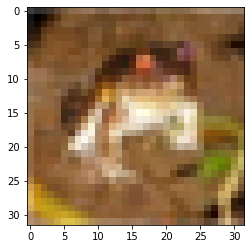

In [22]:
# We can do transpose (3,32,32) index - (0,1,2)
plt.imshow(sample.transpose(1,2,0))

In [23]:
# We will do it on all images so that we can view
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
X[0].max()

255

In [24]:
(X[0]/255).max()

1.0

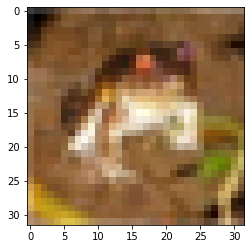

In [25]:
plt.imshow(X[0])

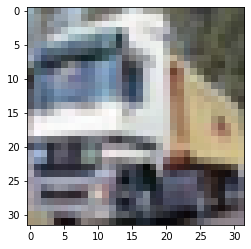

In [26]:
plt.imshow(X[1])

# Helper Functions for Dealing With Data.

** Use the provided code below to help with dealing with grabbing the next batch once you've gotten ready to create the Graph Session. Can you break down how it works? **

In [27]:
def one_hot_encode(vec, vals=10):
    '''
    For use to one-hot encode the 10- possible labels , vecs- Vector of labels
    '''
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

In [28]:
class CifarHelper():
    
    def __init__(self):
        self.i = 0
        
        self.all_train_batches = [data_batch1,data_batch2,data_batch3,data_batch4,data_batch5]
        self.test_batch = [test_batch]
        
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
        
        self.training_images = np.vstack([d[b"data"] for d in self.all_train_batches])
        train_len = len(self.training_images)
        
        self.training_images = self.training_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
        self.training_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.all_train_batches]), 10)
        
        print("Setting Up Test Images and Labels")
        
        self.test_images = np.vstack([d[b"data"] for d in self.test_batch])
        test_len = len(self.test_images)
        
        self.test_images = self.test_images.reshape(test_len,3,32,32).transpose(0,2,3,1)/255
        self.test_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.test_batch]), 10)

        
    def next_batch(self, batch_size):
        x = self.training_images[self.i:self.i+batch_size].reshape(100,32,32,3)
        y = self.training_labels[self.i:self.i+batch_size]
        self.i = (self.i + batch_size) % len(self.training_images)
        return x, y

In [29]:
# Before Your tf.Session run these two lines
ch = CifarHelper()
ch.set_up_images()

# During your session to grab the next batch use this line
# (Just like we did for mnist.train.next_batch)
# batch = ch.next_batch(100)

Setting Up Training Images and Labels
Setting Up Test Images and Labels


---

## Creating Model


In [30]:
import tensorflow as tf

#### Steps

1.Helper Functions \
2.Placeholders \
3.Layers \
4.Loss Function \
5.Optimizer \
6.Initialize Variables \
7.Run Session

### Helper Functions for Network

In [31]:
# Helper Functions

## Initialize Weights

def init_weights(shape):
    
    init_random_dist = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(init_random_dist)

## Initialize Bias

def init_bias(shape):
    
    init_bias_vals = tf.constant(0.1,shape=shape)
    return tf.Variable(init_bias_vals)

## Conv2D - Take and tensor and filter and apply convolution operation to it

def conv2d(x,W):
    
    # x -- Input Tensor -- [batch,H,W,Channels]
    # W -- Kernel/Filter -- [filter H , filter W , Channels IN , Channels Out]
    
    # Strides in each dimesnion of x - 4 Dimensions
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME') # Add zeros in paddding


## Pooling

def max_pool_2by2(x):
    
    # x -- Input Tensor -- [batch,H,W,Channels]
    
    # KSIZE - Size of window for Each dimension of input sensor - We only want pooling in [H,W] of individual image in x
    # Strides- Slidding window stride - - We only want strides in [H,W] of individual image in x
    return tf.nn.max_pool(x,ksize = [1,2,2,1] ,strides=[1,2,2,1],padding='SAME')

## Creating Convolution Layers

def convolution_layer(input_x,shape):
    
    W = init_weights(shape)
    b = init_bias([shape[3]])
    
    ## Activation Function
    return tf.nn.relu(conv2d(input_x,W) + b)

## Crearing Normal Layer - Fully Connected Layer

def normal_full_layer(input_layer,size):
    
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size,size])
    b = init_bias([size])
    
    return tf.matmul(input_layer,W) + b

### Placeholders

In [32]:
## Create placeholders
x = tf.placeholder(tf.float32,shape=[None,32,32,3]) # We have input in form of shape [None,32,32,3]
y_true = tf.placeholder(tf.float32,shape=[None,10])
hold_prob = tf.placeholder(tf.float32)

### Layers


In [33]:
# Layers

'''
##Image layer or Input

### We want to replace Flattend array of 784 into image of 28 * 28 ,  1 - Grayscale

#### -1 is a placeholder that is calculated during run time. 
#### This is typically for number of samples that can be different during every run.
x_image = tf.reshape(x,[-1,28,28,1]) 

'''

# Image Layer is not needed because it is already in form of [32,32,3] #3 - RGB channels

## First Convolution Layer
convo_1 = convolution_layer(x,shape=[4,4,3,32]) # 4*4 convolution - 32 Features for Each 4*4 patch , 3-Channel ,32-Output Channels

## First Pooling Layer
convo_1_pooling = max_pool_2by2(convo_1)

## Second Convolution layer - Takes output of previous pooling layer
convo_2 = convolution_layer(convo_1_pooling,shape=[4,4,32,64]) # 64 Features

## Second Pooling layer
convo_2_pooling = max_pool_2by2(convo_2)

## Flatten Second pooling layer to connect it to Fully Connected Layer

## 8*8 - The original image is 32*32, you do max pool by 2 times, each time the image is downscaled by 2 so 32/2/2 = 8.
convo_2_flat = tf.reshape(convo_2_pooling,[-1,8*8*64])

## First Fully Connected Layer  

#### 1024 Neurons
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))


## Adding Dropout 
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

## Output Layer
y_pred = normal_full_layer(full_one_dropout,10) ## 10 Labels 

### Loss Function , Optimizer , Initialize Variables , Run Session



In [35]:
## Loss Function,Optimizer,Initialize Varaibles,Run Session


### Loss Function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

### Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cross_entropy)

### Initialize Variables
init = tf.global_variables_initializer()

### Run Session
steps =7000

with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(steps):
        
        # take 50 images in batch
        #batch_x,batch_y = mnist.train.next_batch(50)
        
        batch = ch.next_batch(100) #take 100 images in batch
        
        sess.run(train,feed_dict={x:batch[0],y_true:batch[1],hold_prob:0.5})
        
        # At Every 100 steps - Report Back Accuracy 
        
        if i%100 == 0:
            
            print('On Step : {} '.format(i))
            print('Accuracy : ')
            matches = tf.equal(tf.argmax(y_pred,1),tf.arg_max(y_true,1))
            acc = tf.reduce_mean(tf.cast(matches,tf.float32))
            
            print(sess.run(acc,feed_dict ={x:ch.test_images,y_true:ch.test_labels,hold_prob:1.0})) #1.0 No neurons will be dropped
            print('\n')         

On Step : 0 
Accuracy : 
0.1006


On Step : 100 
Accuracy : 
0.4086


On Step : 200 
Accuracy : 
0.4574


On Step : 300 
Accuracy : 
0.4993


On Step : 400 
Accuracy : 
0.5203


On Step : 500 
Accuracy : 
0.5283


On Step : 600 
Accuracy : 
0.5602


On Step : 700 
Accuracy : 
0.5512


On Step : 800 
Accuracy : 
0.572


On Step : 900 
Accuracy : 
0.5641


On Step : 1000 
Accuracy : 
0.5913


On Step : 1100 
Accuracy : 
0.6107


On Step : 1200 
Accuracy : 
0.611


On Step : 1300 
Accuracy : 
0.6173


On Step : 1400 
Accuracy : 
0.6227


On Step : 1500 
Accuracy : 
0.6337


On Step : 1600 
Accuracy : 
0.6418


On Step : 1700 
Accuracy : 
0.6405


On Step : 1800 
Accuracy : 
0.6473


On Step : 1900 
Accuracy : 
0.6295


On Step : 2000 
Accuracy : 
0.6503


On Step : 2100 
Accuracy : 
0.6499


On Step : 2200 
Accuracy : 
0.6732


On Step : 2300 
Accuracy : 
0.6588


On Step : 2400 
Accuracy : 
0.6659


On Step : 2500 
Accuracy : 
0.6649


On Step : 2600 
Accuracy : 
0.665


On Step : 2700 
